In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import random


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 50s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [ ]:
x_train.shape

(45000, 32, 32, 3)

# Data Visualization

array([1], dtype=uint8)

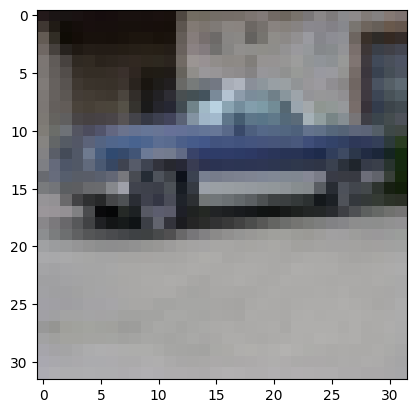

In [9]:
i = 10000
plt.imshow(x_train[i])
y_train[i]

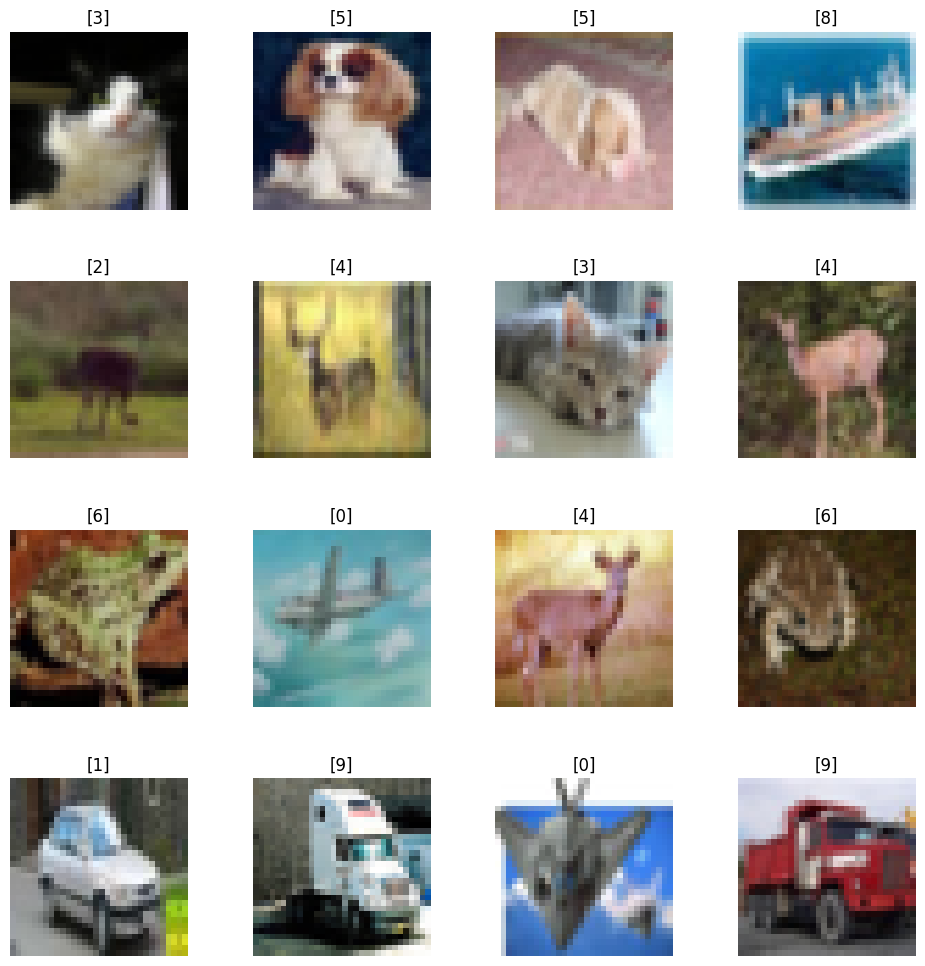

In [10]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(W_grid, L_grid, figsize = (12, 12))

axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

# Data processing

In [11]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
number_categ = 10

In [15]:
y_train = tf.keras.utils.to_categorical(y_train, number_categ)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [17]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [18]:
y_test = tf.keras.utils.to_categorical(y_test, number_categ)

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [20]:
x_train = x_train / 255
x_test = x_test / 255

In [21]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [22]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
input_shape = x_train.shape[1:]

In [24]:
y_train.shape

(50000, 10)

# Model

In [25]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

/home/eduardo/Downloads/current_code_master/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,639,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,764,842 (10.55 MB)

 Trainable params: 2,764,842 (10.55 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])

/home/eduardo/Downloads/current_code_master/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [28]:
epochs = 100
history = cnn.fit(x_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 558ms/step - accuracy: 0.1463 - loss: 2.2433
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 577ms/step - accuracy: 0.2604 - loss: 2.0102
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 597ms/step - accuracy: 0.3197 - loss: 1.8774
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 408ms/step - accuracy: 0.3561 - loss: 1.7871
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 407ms/step - accuracy: 0.3772 - loss: 1.7218
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 424ms/step - accuracy: 0.3968 - loss: 1.6682
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 426ms/step - accuracy: 0.4104 - loss: 1.6311
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 348ms/step - accuracy: 0.4259 - loss: 1.5867
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.4361 - loss: 1.5615
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 345ms/step - accuracy: 0.4486 - loss: 1.5295
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 345ms/step - accuracy: 0.4606 - loss: 1.4911
Epoch 12/100
98/98 ━━━━━━━━━━━

# Model Assessment

In [29]:
evaluation = cnn.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7533 - loss: 0.7327
Test Accuracy: 0.7544999718666077


In [30]:
predicted_classes = cnn.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis = 1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [31]:
y_test = y_test.argmax(1)

In [32]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

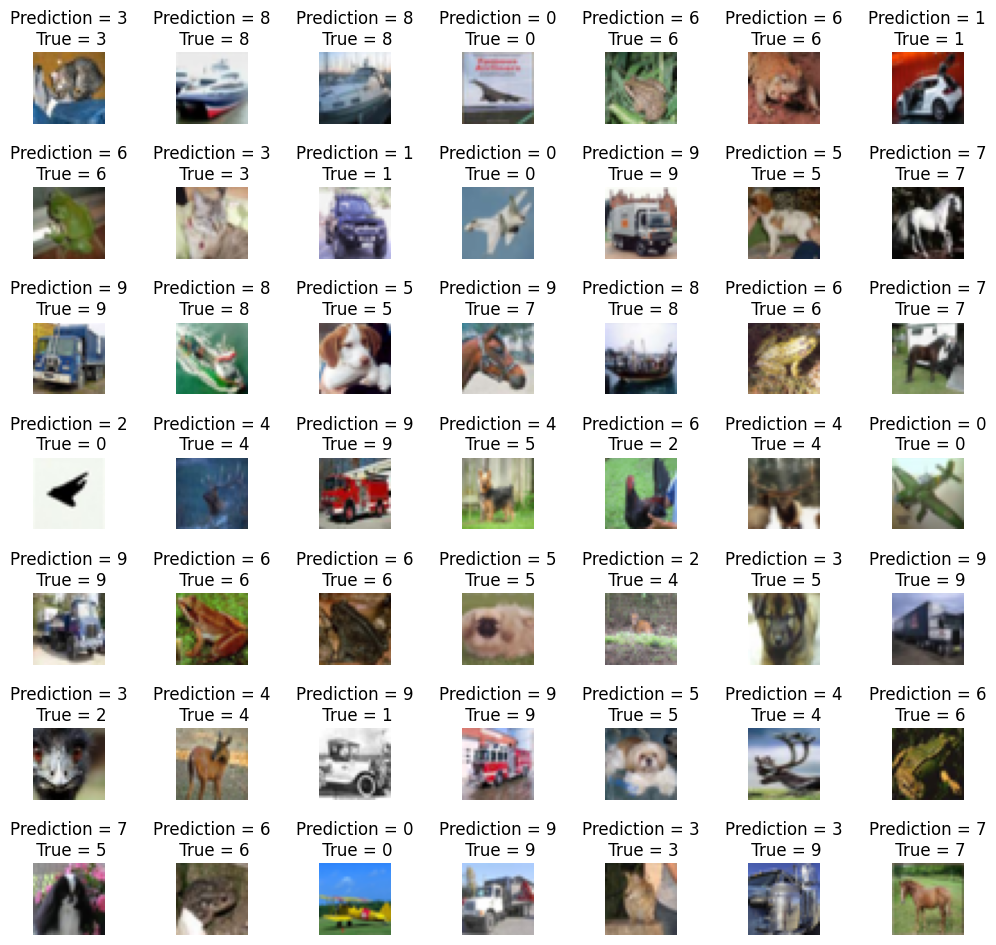

In [33]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

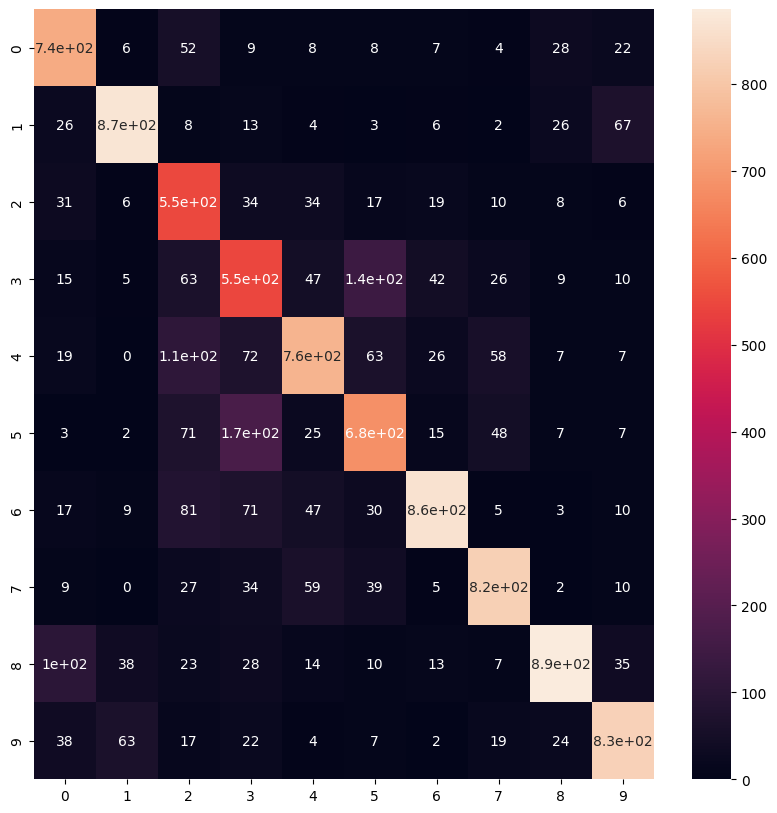

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [35]:
cm

array([[739,   6,  52,   9,   8,   8,   7,   4,  28,  22],
       [ 26, 871,   8,  13,   4,   3,   6,   2,  26,  67],
       [ 31,   6, 549,  34,  34,  17,  19,  10,   8,   6],
       [ 15,   5,  63, 546,  47, 139,  42,  26,   9,  10],
       [ 19,   0, 109,  72, 758,  63,  26,  58,   7,   7],
       [  3,   2,  71, 171,  25, 684,  15,  48,   7,   7],
       [ 17,   9,  81,  71,  47,  30, 865,   5,   3,  10],
       [  9,   0,  27,  34,  59,  39,   5, 821,   2,  10],
       [103,  38,  23,  28,  14,  10,  13,   7, 886,  35],
       [ 38,  63,  17,  22,   4,   7,   2,  19,  24, 826]])